## 딥러닝(Deep Learning)
  * 인공신경망(artificial neural network)
  * 인간 두뇌의 작동 원리를 응용하여 고안한 방식
  * 다중계층으로 이루어진 신경망의 구조
  * 입력되는 훈련 데이터로 딥러닝 훈련
  * 신경망(Neural Network): 인간의 뇌신경 세포를 모방하여 만든 수학적 모델

### 신경망(Neural Network)
  * 딥러닝의 신경망은 층(또는 레이어)으로 구성된 계층구조로 이루어져 있음
  * 데이터가 처음으로 입력되는 입력층(Input Layer)과 마지막 결과가 출력되는 출력층(Output Layer)가 있음
  * 이 사이에는 선택적으로 여러 개의 은닉층을 가질 수 있음

#### 가중치 계산을 위한 함수
* 초기화된 가중치는 입력이 반복됨에 따라 더욱 적합한 값을 가질 수 있도록 첫 예측값 Y와 진짜 타깃 X의 오차를 최소화해야 함
  1. 활성화 함수(Activation Function)
    * 최적화 함수로 구한 값을 기반으로 다음 계층의 입력값을 활성화 함수(Activation Function)로 계산하여 다음 입력으로 사용
  2. 손실 함수(Loss Function)
    * 손실 함수를 통해 예측값 Y와 진짜 타깃 X의 오차를 구하고
  3. 최적화 함수(Optimization Function)
    * 이러한 오차를 줄이기 위하여 최적화 함수를 사용하여 가중치를 최적화하도록 적절히 조절한 후

* 이러한 과정을 반복하면 딥러닝의 신경망 모델을 최적화 할 수 있음

#### 활성화 함수(Activation Function)
  * 인공 신경망 내부에서 입력받은 데이터를 근거로 다음 계층으로 출력할 값을 결정하는 기능 수행
  * 신경망 구성 시 설정, 각 레이어를 정의할 때 세부적인 함수를 선택하게 됨
  * 일반적으로 은닉층에서는 "sigmoid" 함수를 사용하기도 하는데 이 함수는 학습하는 과정에서 0에 가까워지는 Vanishing Gradient 문제가 있음
  * 따라서 이러한 문제를 개선한 "relu" 함수를 주로 사용함
    * "relu" 함수는 양수 값이 나오면 그대로 반환하지만 음수 값이 나오면 0을 반환하는 특성을 가짐


  | 설정 시기 | 딥러닝 목표 | 활성화 함수 |
  |----------|------------|------------|
  | 컴파일 시 |      -     | relu/sigmoid |
  |          |   이진분류  |    sigmoid   |
  |          |   다중분류  |    softmax   |

#### 손실 함수(Loss/Cost Function)
  * 예측값(측정값)과 실제값의 차이를 구하기 위한 함수
  * 신경망 컴파일 시 설정, 신경망의 목표와 일치하는 함수를 선택해야 함

  | 설정 시기 | 딥러닝 목표 | 함수 |
  |----------|-----------|------|
  | 컴파일 시 |  회귀분석  | cross-entropy |
  |          |  이진분류  | binary_crossentropy |
  |          |  다중분류  | categorical_crossentropy |
  

#### 최적화 함수(Optimizer Function)
  * 손실 함수의 결과값을 최소화하는 함수
  * 경사하강법(Gradient Descent) 사용
  * 컴파일 과정에서 함수 정의
  * 확률적 경사하강법(SGD; Stochastic Gradient Descent) - 경사하강법 개선
  * RMSProp 방식 - 확률적 경사하강법 개선

### Tensorflow & Keras
  * 딥러닝 모델의 학습 수행 과정
    * 모델 구조 생성: 단수 또는 복수 개의 계층(layer)으로 구성된 신경망 모델의 구조 생성
      * Keras: `models`라는 신경망 모델 사용하여 신경망의 계층(Layer) 생성
      * `models.Sequential()` 함수로 설정하면 설정하는 모든 레이어를 선형적인 순서로 나열하겠다는 것
      * `add()` 함수 사용 시 계층 생성
      * `Dense()` 함수를 이용하면 해당 계층을 설정할 수 있음 - Keras의 `layers`에서 지원
        * 예: `model.add(layers.Dense(1, input_dim=2, activation='sigmoid'))`
        * 첫 번째 인자(`1`): 출력 뉴런의 수. 여기에 1로 설정하면 `(샘플 개수, 1)`의 배열 형식으로 출력
        * 두 번째 인자(`input_dim=2`): 입력 데이터 개수가 2개라는 의미
          * `input_dim=2` 대신 `input_shape=(2,)`를 사용하여도 무방함
        * 마지막 인자(`activation='sigmoid'`) 활성화(activation) 함수로 'sigmoid'를 선택했다는 의미

In [1]:
from keras import models
from keras import layers

In [2]:
model = models.Sequential()
model.add(layers.Dense(1, input_dim=2, activation='sigmoid'))

* 위의 예제에서는 계층이 단일 계층으로 구성되어 입력 계층이자 출력 계층이 됨
* 위의 예제는 이진분류이므로 활성화 함수를 sigmoid로 하였음
* 대부분의 경우 출력 결과는 0 또는 1에 가까운 실수형 값으로 나타남
* 0에 가까운 실수는 0번 군집, 1에 가까운 실수는 1번 군집을 의미

#### 2개의 계층을 사용하는 경우
  * 첫 번째 계층: 입력 계층
  * 두 번째 계층: 출력 계층
    * 출력을 반드시 1로 설정하고 활성화 함수를 이곳으로 이동

In [3]:
from keras import models
from keras import layers

In [4]:
model = models.Sequential(
    [
        layers.Dense(4, input_shape=(2,)),
        layers.Dense(1, activation='sigmoid')
    ]
)

In [5]:
model.compile(optimizer='SGD', loss='binary_crssentropy')

In [6]:
# history = model.fit(X_train, y_train)

### 신경망의 데이터 구조
|    | 처리 데이터 구조 | 텐서 형식 |
|----|----------------|----------|
| 1  | 2D 텐서 벡터 데이터 처리 | (sample, features) |
| 2  | 3D 텐서 시퀀스 데이터 처리 | (sample, timesteps, features) |
| 3  | 4D 텐서 이미지 데이터 처리 | 2D 합성곱층(Conv2D) |

In [7]:
from keras import models
from keras import layers

In [8]:
model = models.Sequential()
model.add(layers.Dense(8, input_shape=(3, 4), activation='relu'))
model.add(layers.Dense(1, activation=('softmax')))

In [9]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

### 이진 분류(Binary Classification) 모델
  * 딥러닝의 결과가 둘 중 하나를 예측하는 모델

In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

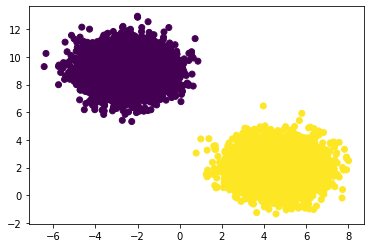

In [11]:
data, labels = make_blobs(n_samples=10000, n_features=2, centers=2, random_state=42)

plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.show()

#### `make_blobs()`
  * 등방성 가우시안 정규분포를 이용하여 가상 데이터 생성
    * 등방성: 모든 방향으로 같은 성질을 가짐
    * 클러스터링을 위한 가상 데이터 생성에 사용
  * 인수
    | 파라미터 | 내용 |
    |---------|-----|
    | n_samples | 만들고자 하는 샘플의 총 개수 |
    | n_features | 각 샘플들에 대한 속성(feature)의 개수 |
    | centers | 중심(군집)의 개수 |
    | random_state | 무작위의 수를 생성하기 위한 생성기의 종류 |
  * 반환값
    * x: [n_samples, n_features] 크기의 배열, 독립 변수
    * y: [n_samples] 크기의 배열, 종속 변수

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs

c:\Users\YWIS\anaconda3\envs\ai\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:906: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if zdir == 'x':
c:\Users\YWIS\anaconda3\envs\ai\lib\site-packages\mpl_toolkits\mplot3d\art3d.py:908: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif zdir == 'y':


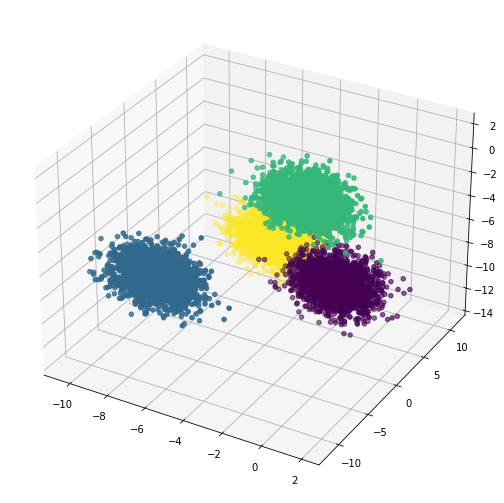

In [13]:
data, labels = make_blobs(n_samples=10000, n_features=4, centers=4, random_state=1)

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2], data[:, 3], c=labels)
plt.show()

In [14]:
data, labels = make_blobs(n_samples=10000, n_features=2, centers=2, random_state=42)

In [15]:
print(data[:5])
print(labels[:5])

[[ 4.21810197  1.83852559]
 [ 5.55650652  2.25768167]
 [-2.1884119   9.20833807]
 [-2.3182811   8.97795552]
 [ 5.32670633  1.57484267]]
[1 1 0 0 1]


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

In [18]:
from keras import models
from keras import layers

In [19]:
model = models.Sequential()
model.add(layers.Dense(1, input_dim=2, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


* 파라미터 수 계산: (입력 개수 + 가중치 개수) * 출력 개수
  * 예: `models.add(layers.Dense(3, input_dim=4, activation='sigmoid'))`
  * (4(입력) + 가중치(1)) * 출력(3) = 15

In [21]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=40, batch_size=100)

Epoch 1/40
80/80 [==============================] - 1s 2ms/step - loss: 0.2069 - accuracy: 0.9251
Epoch 2/40
80/80 [==============================] - 0s 2ms/step - loss: 0.0254 - accuracy: 1.0000
Epoch 3/40
80/80 [==============================] - 0s 2ms/step - loss: 0.0191 - accuracy: 1.0000
Epoch 4/40
80/80 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 1.0000
Epoch 5/40
80/80 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9999
Epoch 6/40
80/80 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9999
Epoch 7/40
80/80 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9999
Epoch 8/40
80/80 [==============================] - 0s 2ms/step - loss: 0.0109 - accuracy: 0.9999
Epoch 9/40
80/80 [==============================] - 0s 2ms/step - loss: 0.0101 - accuracy: 0.9999
Epoch 10/40
80/80 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 0.9999
Epoch 11/40
80/80 [

In [22]:
result = model.evaluate(X_test, y_test)
result

63/63 [==============================] - 0s 1ms/step - loss: 0.0041 - accuracy: 1.0000


[0.004085517022758722, 1.0]

In [23]:
weights, bias = model.get_weights()
print(weights)
print(bias)

[[ 1.5966839 ]
 [-0.39921996]]
[0.00679207]


In [24]:
a = -(weights[0] / weights[1]) / (weights[0] / bias)
b = -weights[0] / weights[1]

In [25]:
import numpy as np

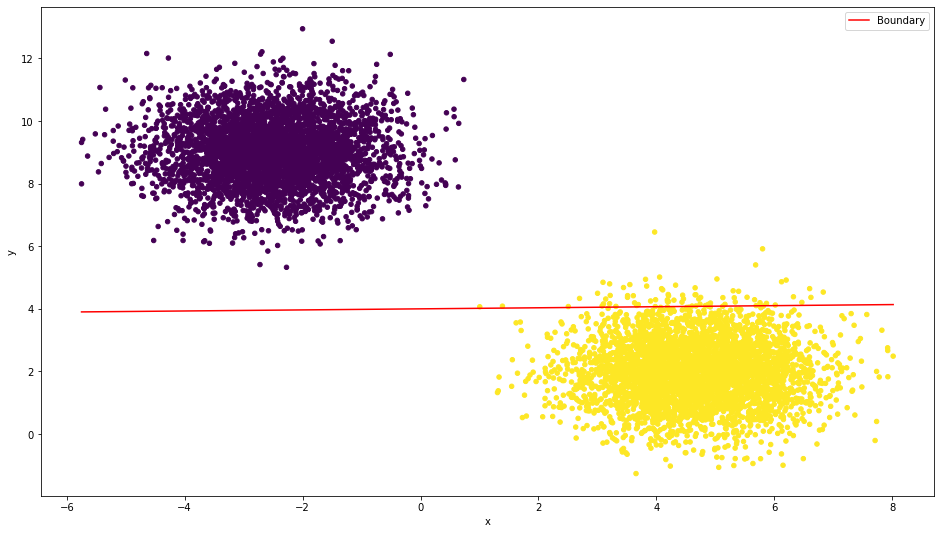

In [26]:
x = np.linspace(np.amin(X_train[:, 0]), np.amax(X_train[:, 0]))
y = [a * i + b for i in x]

plt.figure(figsize=(16,9))
plt.plot(x, y, color='red', label='Boundary')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20)
plt.legend()

In [27]:
test = np.array([[2, -2], [2, 2.5], [2, 4], [2, 12]])
pred = model.predict(test)
print(pred)
# 좌상단이 0번 군집, 우하단이 1번 군집으로 보임

1/1 [==============================] - 0s 94ms/step
[[0.981989  ]
 [0.90043885]
 [0.8324763 ]
 [0.16931643]]


### 다중 분류(Multiple Classification) 모델
  * 이진 분류와의 공통점과 차이점
    * 공통점: 여러 개 중 하나를 선택한다는 것
    * 차이점: 2개 중 1개를 선택하기 위하여는 1개의 출력 단자만 필요하지만 그 이상의 종류 중 하나를 선택하려면 2개 이상의 출력 단자가 필요

In [28]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [29]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
print(X_train.shape)

(120, 4)


In [31]:
print(X_test[0])
print(y_test[0])

[4.6 3.4 1.4 0.3]
0


In [32]:
from keras.utils.np_utils import to_categorical

* 원-핫 인코딩(One-Hot Encoding) 기법으로 라벨 리스트를 변환

In [33]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [34]:
print(y_train[0])
print(y_test[0])

[0. 0. 1.]
[1. 0. 0.]


* 여기서는 세 가지 중 하나를 예측하는 딥러닝 모델, 다중 분류 모델이므로 출력 단자가 3개여야 함
* 입력 특성(feature)이 4개이므로 `input_dim=4` 또는 `input_shape=(4,)`로 설정
* 활성화 함수는 이진 분류 방식의 "sigmoid"가 아닌 "softmax" 사용

In [35]:
from keras import models
from keras import layers

In [36]:
model = models.Sequential([
    layers.Dense(2, input_shape=(4,)),
    layers.Dense(3, activation='softmax')
])

In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 2)                 10        
                                                                 
 dense_7 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


* (None, 2)
  * None: 입력 샘플 수가 정해지지 않았으며 계속해서 입력을 받을 수 있음
  * 2: 출력 단자 개수
* `layers.Dense(2, input_shape=(4,)`
  * 파라미터 개수: (4(입력 개수) + 1(가중치)) * 2(출력 개수) = 10
* `layers.Dense(3, activation='softmax')`
  * 파라미터 개수: (2(입력 개수) + 1(가중치)) * 3(출력 개수) = 9
* 총 파라미터 개수: 19

In [38]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 2ms/step - loss: 5.3470 - accuracy: 0.0583
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 5.1617 - accuracy: 0.0083
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 5.0414 - accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 4.9365 - accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 4.8339 - accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 4.7359 - accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 4.6451 - accuracy: 0.0000e+00
Epoch 8/100
4/4 [==============================] - 0s 1ms/step - loss: 4.5568 - accuracy: 0.0000e+00
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 4.4698 - accuracy: 0.0000e+00
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 4.3858 - accuracy: 0.0000e+

In [40]:
results = model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 139ms/step - loss: 0.6328 - accuracy: 0.7667


In [41]:
# prediction = model.predict(X_test[0])
# print(prediction)
"""
위와 같이 입력하면 에러가 발생함
입력이 (*, 4) 형식의 배열이어야 하는데
X_test[0]은 4개의 원소로 구성된 1차원 배열이라
신경망의 입력과 일치하지 않기 때문
"""

'\n위와 같이 입력하면 에러가 발생함\n입력이 (*, 4) 형식의 배열이어야 하는데\nX_test[0]은 4개의 원소로 구성된 1차원 배열이라\n신경망의 입력과 일치하지 않기 때문\n'

In [42]:
# 오류 방지를 위하여 아래와 같이 2차원 형태로 입력
print(X_test[:1])
prediction = model.predict(X_test[:1])
print(prediction)

[[4.6 3.4 1.4 0.3]]
1/1 [==============================] - 0s 44ms/step
[[0.6213601  0.34849277 0.03014709]]


In [43]:
my_test = [7.2, 3.6, 6.1, 2.5]
prediction = model.predict([my_test])
print(prediction)

1/1 [==============================] - 0s 32ms/step
[[0.15071887 0.19168204 0.6575991 ]]


In [44]:
print(y_test[:5])

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [45]:
import numpy as np

In [46]:
prediction = model.predict(X_test[:5])

print('[결과 라벨] [예측 라벨]')
for _ in range(5):
    print(' ', np.argmax(y_test[_]), end=' : ')
    print(np.argmax(prediction[_]))

1/1 [==============================] - 0s 20ms/step
[결과 라벨] [예측 라벨]
  0 : 0
  0 : 0
  0 : 0
  0 : 0
  2 : 2


### 회귀(Regression) 모델
  * 다수 중에 선택하는 것이 아니라 특정 값을 예측하는 모델

In [47]:
import pandas as pd

In [48]:
column_names = ['연비', '기통수', '배기량', '마력', '중량', '가속력', '연식', '제조국가']

dataset = pd.read_csv('tutorial/16/automobile.csv', names=column_names, comment='\t', sep=' ', skipinitialspace=True)
dataset.head()

,연비,기통수,배기량,마력,중량,가속력,연식,제조국가
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


| 파라미터 | 설명 |
|---------|-----|
| sep=' ' | 구분자 |
| comment | 지정 문자 이후 파싱 금지 |
| skipinitialspace | 구분자 다음의 공란을 생략하지 않으면 NaN으로 읽힘 |

In [49]:
dataset.isnull().sum()

연비      8
기통수     0
배기량     0
마력      6
중량      0
가속력     0
연식      0
제조국가    0
dtype: int64

In [50]:
# NaN 데이터 제거
dataset = dataset.dropna()

In [51]:
code = [1, 2, 3]
nations = ['미국', '유럽', '일본']

dataset['제조국가'].replace(code, nations, inplace=True)
dataset.iloc[17:20]

,연비,기통수,배기량,마력,중량,가속력,연식,제조국가
23,21.0,6.0,200.0,85.0,2587.0,16.0,70.0,미국
24,27.0,4.0,97.0,88.0,2130.0,14.5,70.0,일본
25,26.0,4.0,97.0,46.0,1835.0,20.5,70.0,유럽


In [52]:
dataset = pd.concat([dataset, pd.get_dummies(dataset['제조국가'], dtype=float)], axis=1, sort=False)
dataset.iloc[17:20]

,연비,기통수,배기량,마력,중량,가속력,연식,제조국가,미국,유럽,일본
23,21.0,6.0,200.0,85.0,2587.0,16.0,70.0,미국,1.0,0.0,0.0
24,27.0,4.0,97.0,88.0,2130.0,14.5,70.0,일본,0.0,0.0,1.0
25,26.0,4.0,97.0,46.0,1835.0,20.5,70.0,유럽,0.0,1.0,0.0


In [53]:
dataset.pop('제조국가')
dataset.head(3)

,연비,기통수,배기량,마력,중량,가속력,연식,미국,유럽,일본
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,0.0,0.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,0.0,0.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,0.0,0.0


In [54]:
len(dataset.index)

392

In [55]:
train_data = dataset.sample(350)
len(train_data.index)

350

In [56]:
test_data = dataset.drop(train_data.index)
len(test_data.index)

42

In [57]:
y_train = train_data['연비']
y_test = test_data['연비']
y_test.head(3)

7     14.0
31    10.0
35    27.0
Name: 연비, dtype: float64

In [58]:
train_data.pop('연비')
test_data.pop('연비')
train_data[:3]

,기통수,배기량,마력,중량,가속력,연식,미국,유럽,일본
176,6.0,232.0,100.0,2914.0,16.0,75.0,1.0,0.0,0.0
358,4.0,98.0,65.0,2045.0,16.2,81.0,1.0,0.0,0.0
346,4.0,151.0,84.0,2635.0,16.4,81.0,1.0,0.0,0.0


In [59]:
from keras import models
from keras import layers

In [60]:
print(len(train_data.keys()))

9


* 파라미터 수 계산
  * 입력 계층: (9 + 1) * 32 = 320
  * 은닉 계층: (32 + 1) * 64 = 2112
  * 출력 계층: (64 + 1) * 1 = 65
  * 총 2497 개

In [61]:
model = models.Sequential([
    layers.Dense(32, activation='relu', input_dim=len(train_data.keys())),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
# "relu" 방식은 음수 값은 0을 반환하고 양수 값은 그 값을 그대로 반환하는 방식

In [62]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                320       
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

* 여기서는 "metrics"를 "accuracy"가 아닌 "mae(Mean Absolute Error)"로 설정하여 평균 에러값을 구하도록 함
* 이후에 훈련된 신경망에서 예측한 값의 오차를 "mae" 값을 통해 가늠할 수 있음

In [64]:
history = model.fit(train_data, y_train, validation_split=0.2, epochs=200)

Epoch 1/200
9/9 [==============================] - 1s 19ms/step - loss: 5903.8047 - mae: 40.9617 - val_loss: 175.8540 - val_mae: 11.0413
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 164.5413 - mae: 10.6008 - val_loss: 187.5443 - val_mae: 11.3252
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 352.2156 - mae: 15.1534 - val_loss: 1132.0062 - val_mae: 27.0640
Epoch 4/200
9/9 [==============================] - 0s 4ms/step - loss: 695.1795 - mae: 22.7911 - val_loss: 269.0762 - val_mae: 13.7350
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 662.1773 - mae: 19.7712 - val_loss: 2068.5298 - val_mae: 38.5632
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 661.8594 - mae: 19.1550 - val_loss: 157.5621 - val_mae: 10.3794
Epoch 7/200
9/9 [==============================] - 0s 5ms/step - loss: 408.8953 - mae: 15.9235 - val_loss: 1923.8788 - val_mae: 37.0977
Epoch 8/200
9/9 [==============================] -

In [65]:
mse, mae = model.evaluate(train_data, y_train)

11/11 [==============================] - 0s 2ms/step - loss: 356.5933 - mae: 16.7316


In [66]:
test_data[:1]

,기통수,배기량,마력,중량,가속력,연식,미국,유럽,일본
7,8.0,440.0,215.0,4312.0,8.5,70.0,1.0,0.0,0.0


In [67]:
prediction = model.predict(test_data[:1])
print(f'예측: {prediction}')
print(f'MAE: {mae}')

1/1 [==============================] - 0s 99ms/step
예측: [[33.62093]]
MAE: 16.731647491455078


### 딥러닝 모델의 성능
  * 딥러닝 신경망의 성능 향상을 위해 필요한 성능 분석 방법과 성능 향상 기법 소개
  * 신경망 성능 향상을 위해서는 모델 성능 평가가 선행되어야 함
  * 이를 위하여 유효성 데이터(validation data)를 별도로 준비하여 정확도와 손실률을 측정
  
  1. 성능 향상 방법
    1) 신경망의 구조를 강화/축소(복수개의 노드 또는 레이어 사용)
    2) 최적 함수 적용(활성화 함수, 손실 함수, 최적화 함수)
    3) 학습 반복횟수 조절(epochs)
  2. 유효성 데이터를 활용한 모델의 성능 평가
  3. 최적의 결과를 얻을 때까지 1, 2 과정 반복

* 모델 성능 평가의 핵심: 과대적합(overfitting) 또는 과소적합(underfitting)이 발생했을 때 이를 방지하도록 신경망을 개선해가는 것
  * 과대적합인 경우: 심층 신경망 간소화 또는 학습 횟수 감소
  * 과소적합인 경우: 심층 신경망 확대 또는 학습 횟수 증가

* 과대적합의 경우
  * 훈련 데이터의 정확도가 유효성 데이터의 값보다 훨씬 큰 경우
  * 훈련 데이터의 손실률이 유효성 데이터의 값보다 훨씬 작은 경우
* 과소적합은 과대적합의 반대

In [68]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

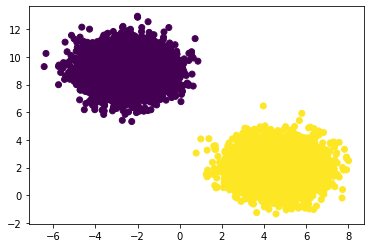

In [69]:
data, labels = make_blobs(n_samples=10000, n_features=2, centers=2, random_state=42)

plt.scatter(data[:, 0], data[:, 1], c=labels)
plt.show()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)

X_val = X_train[:1000]
X_train = X_train[1000:]
y_val = y_train[:1000]
y_train = y_train[1000:]

In [71]:
from keras import models
from keras import layers

In [72]:
model = models.Sequential([
    layers.Dense(1, input_dim=2, activation='sigmoid')
])

In [73]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [75]:
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_val, y_val))

Epoch 1/10
70/70 [==============================] - 1s 4ms/step - loss: 0.0594 - accuracy: 0.9973 - val_loss: 0.0411 - val_accuracy: 0.9980
Epoch 2/10
70/70 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 0.9996 - val_loss: 0.0278 - val_accuracy: 0.9980
Epoch 3/10
70/70 [==============================] - 0s 1ms/step - loss: 0.0246 - accuracy: 0.9996 - val_loss: 0.0215 - val_accuracy: 0.9990
Epoch 4/10
70/70 [==============================] - 0s 2ms/step - loss: 0.0196 - accuracy: 0.9997 - val_loss: 0.0179 - val_accuracy: 0.9990
Epoch 5/10
70/70 [==============================] - 0s 1ms/step - loss: 0.0166 - accuracy: 0.9999 - val_loss: 0.0156 - val_accuracy: 0.9990
Epoch 6/10
70/70 [==============================] - 0s 1ms/step - loss: 0.0145 - accuracy: 0.9999 - val_loss: 0.0139 - val_accuracy: 0.9990
Epoch 7/10
70/70 [==============================] - 0s 2ms/step - loss: 0.0130 - accuracy: 0.9999 - val_loss: 0.0127 - val_accuracy: 0.9990
Epoch 8/10
70/70 [==

In [76]:
result = model.evaluate(X_test, y_test)
result

63/63 [==============================] - 0s 951us/step - loss: 0.0099 - accuracy: 1.0000


[0.009903555735945702, 1.0]

In [77]:
import matplotlib.pyplot as plt

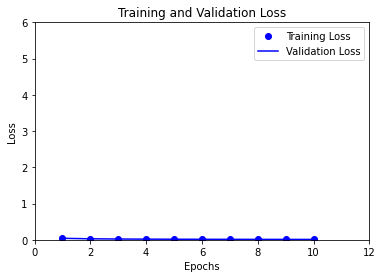

In [78]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.axis([0, 12, 0.0, 6.0])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

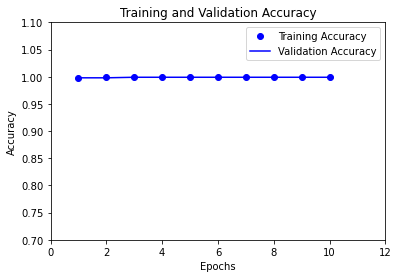

In [79]:
plt.clf()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.axis([0, 12, 0.7, 1.1])
plt.legend()
plt.show()

### 심층 신경망 구조 만들기
  * 심층 신경망(Deep Neural Network): 신경망을 구성하고 있는 레이어의 개수가 많아짐
  * 각 레이어에서 사용하는 뉴런의 개수 또한 영향을 미침

In [80]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

In [81]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [82]:
from keras import models
from keras import layers

In [83]:
model = models.Sequential([
    # 얕은 신경망
    # layers.Dense(2, input_shape=(4, )),
    # layers.Dense(3, activation='softmax'),

    # 심층 신경망
    layers.Dense(2, input_shape=(4, )),
    layers.Dense(16, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')
])

In [84]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics='accuracy')

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 97ms/step - loss: 2.0189 - accuracy: 0.3021 - val_loss: 1.0448 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 1.7071 - accuracy: 0.3021 - val_loss: 0.9748 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 1.5361 - accuracy: 0.3021 - val_loss: 0.9383 - val_accuracy: 0.5000
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 1.4224 - accuracy: 0.3021 - val_loss: 0.9151 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 1.3409 - accuracy: 0.3021 - val_loss: 0.8997 - val_accuracy: 0.5000
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 1.2671 - accuracy: 0.3021 - val_loss: 0.8919 - val_accuracy: 0.5000
Epoch 7/100
3/3 [==============================] - 0s 12ms/step - loss: 1.2065 - accuracy: 0.3021 - val_loss: 0.8878 - val_accuracy: 0.5000
Epoch 8/100
3/3 [===

### 학습의 조기 종료와 Dropout 기능
  * 과대 적합을 방지하는 방법으로 사용
  * 학습 조기 종료 방식
    * 훈련의 반복 횟수(epochs)를 크게 잡아놓고 훈련을 시키더라도 적정 수준의 성능이 감지되면 훈련을 멈추는 방식
    * 과대 적합이 발생하기 전에 훈련을 마치게 됨
  * Dropout 방식
    * 과대 적합이 발생하기 쉬운 심층 신경망 구조에서 이를 방지할 수 있는 정규화 기법의 하나
    * 작동 방식
      * 레이어 사이마다 Dropout을 실행하면 훈련이 반복되는 과정 중에 무작위로 해당 레이어의 뉴런을 삭제

In [85]:
from keras import models
from keras import layers
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [86]:
model = models.Sequential([
    layers.Dense(2, input_shape=(4, )),
    layers.Dense(3, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [87]:
early_stopping = EarlyStopping(patience=2)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=1000, callbacks=[early_stopping])

Epoch 1/1000
3/3 [==============================] - 1s 77ms/step - loss: 1.3199 - accuracy: 0.3542 - val_loss: 1.2330 - val_accuracy: 0.5000
Epoch 2/1000
3/3 [==============================] - 0s 12ms/step - loss: 1.2447 - accuracy: 0.4167 - val_loss: 1.2034 - val_accuracy: 0.5000
Epoch 3/1000
3/3 [==============================] - 0s 13ms/step - loss: 1.1983 - accuracy: 0.4688 - val_loss: 1.1822 - val_accuracy: 0.5833
Epoch 4/1000
3/3 [==============================] - 0s 23ms/step - loss: 1.1631 - accuracy: 0.5104 - val_loss: 1.1662 - val_accuracy: 0.5833
Epoch 5/1000
3/3 [==============================] - 0s 13ms/step - loss: 1.1338 - accuracy: 0.5833 - val_loss: 1.1536 - val_accuracy: 0.6250
Epoch 6/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.1089 - accuracy: 0.6146 - val_loss: 1.1439 - val_accuracy: 0.6250
Epoch 7/1000
3/3 [==============================] - 0s 14ms/step - loss: 1.0886 - accuracy: 0.6458 - val_loss: 1.1360 - val_accuracy: 0.6250
Epoch 8/1000


{'loss': [0.059437744319438934, 0.03422343730926514, 0.024633239954710007, 0.019642019644379616, 0.016591055318713188, 0.014525303617119789, 0.01302450243383646, 0.011876254342496395, 0.010961364954710007, 0.010209710337221622], 'accuracy': [0.9972857236862183, 0.9995714426040649, 0.9995714426040649, 0.9997143149375916, 0.9998571276664734, 0.9998571276664734, 0.9998571276664734, 0.9998571276664734, 0.9998571276664734, 0.9998571276664734], 'val_loss': [0.041053809225559235, 0.027796918526291847, 0.02154158055782318, 0.017931880429387093, 0.015585598535835743, 0.013925695791840553, 0.012683164328336716, 0.011708620004355907, 0.01091721747070551, 0.010257625952363014], 'val_accuracy': [0.9980000257492065, 0.9980000257492065, 0.9990000128746033, 0.9990000128746033, 0.9990000128746033, 0.9990000128746033, 0.9990000128746033, 0.9990000128746033, 0.9990000128746033, 0.9990000128746033]} 10


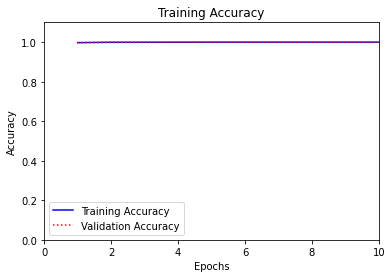

In [88]:
hitory_dict = history.history
print(history_dict, len(history_dict['accuracy']))
plt.clf()
acc = history_dict['accuracy']
epoch_range = range(1, len(acc) + 1)
plt.plot(epoch_range, acc, 'b', label='Training Accuracy')
plt.plot(epoch_range, history_dict['val_accuracy'], 'r:', label='Validation Accuracy')
plt.axis([0, 10, 0.0, 1.1])
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()